### Q1

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

In [113]:
trainData = pd.read_csv("occupancy_train.txt")
testData = pd.read_csv("occupancy_test.txt")


In [114]:
trainData.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [115]:
testData.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [116]:
X_train = trainData[["Humidity", "Light", "HumidityRatio"]]
Y_train = trainData["Occupancy"]

X_test = testData[["Humidity", "Light", "HumidityRatio"]]
Y_test = testData["Occupancy"]

In [117]:
accuracies = {}
for k in range (1,11):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    accuracies[k] = accuracy
    print(f"{k} neighbors -> {accuracy*100:.4f}% accuracy")


1 neighbors -> 94.0338% accuracy
2 neighbors -> 92.5328% accuracy
3 neighbors -> 95.7223% accuracy
4 neighbors -> 94.4841% accuracy
5 neighbors -> 95.5347% accuracy
6 neighbors -> 95.2720% accuracy
7 neighbors -> 96.3227% accuracy
8 neighbors -> 96.1351% accuracy
9 neighbors -> 96.4728% accuracy
10 neighbors -> 96.4728% accuracy


In [118]:
best_k = max(accuracies, key=accuracies.get)
print(f"{best_k} neighbors have the highest accuracy({accuracies[k]*100:.4f}%)")

9 neighbors have the highest accuracy(96.4728%)


### Q2

In [119]:
from sklearn.datasets import load_iris
from collections import Counter
from sklearn.metrics import confusion_matrix

In [120]:
iris = load_iris()

In [121]:
X = iris.data
Y = iris.target

In [122]:
df = pd.DataFrame(X, columns = iris.feature_names)
df['target'] = Y

In [123]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [124]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 67, shuffle = True)

In [125]:
def chi_squared(x,y):
    return np.sum(((x - y)**2) / (x+y))

In [126]:
def knn_pred(X_train, Y_train, test_sample, k):
    distances = []
    for i in range(len(X_train)):
        dist = chi_squared(test_sample, X_train[i])
        distances.append((dist, Y_train[i]))
    distances.sort(key=lambda dist:dist[0])
    neighbors = distances[:k]
    targets = [target for _, target in neighbors]
    most_common_target = Counter(targets).most_common(1)[0][0]
    return most_common_target, neighbors

In [127]:
for k in range(1,11):
    predictions = []
    neighbor_list = []
    correct = 0
    for i in range(len(X_test)):
        pred, neighbors = knn_pred(X_train, Y_train, X_test[i], k)
        predictions.append(pred)
        neighbor_list.append(neighbors)
        if pred == Y_test[i]:
            correct+=1
    accuracy = correct / len(Y_test)
    print(f"K = {k}, Accuracy = {accuracy*100:.2f}%")
    print("------")

K = 1, Accuracy = 93.33%
------
K = 2, Accuracy = 93.33%
------
K = 3, Accuracy = 93.33%
------
K = 4, Accuracy = 93.33%
------
K = 5, Accuracy = 90.00%
------
K = 6, Accuracy = 93.33%
------
K = 7, Accuracy = 93.33%
------
K = 8, Accuracy = 93.33%
------
K = 9, Accuracy = 93.33%
------
K = 10, Accuracy = 93.33%
------


In [128]:
matrix = confusion_matrix(Y_test, predictions)
print("Confusion Matrix")
print(matrix)

Confusion Matrix
[[ 9  0  0]
 [ 0 13  2]
 [ 0  0  6]]


### Q3

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("cancer patient data sets.csv")

In [130]:
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,2,4,3,2,2,4,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,2,2,2,4,2,3,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,7,7,7,7,7,8,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2,4,2,3,High


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

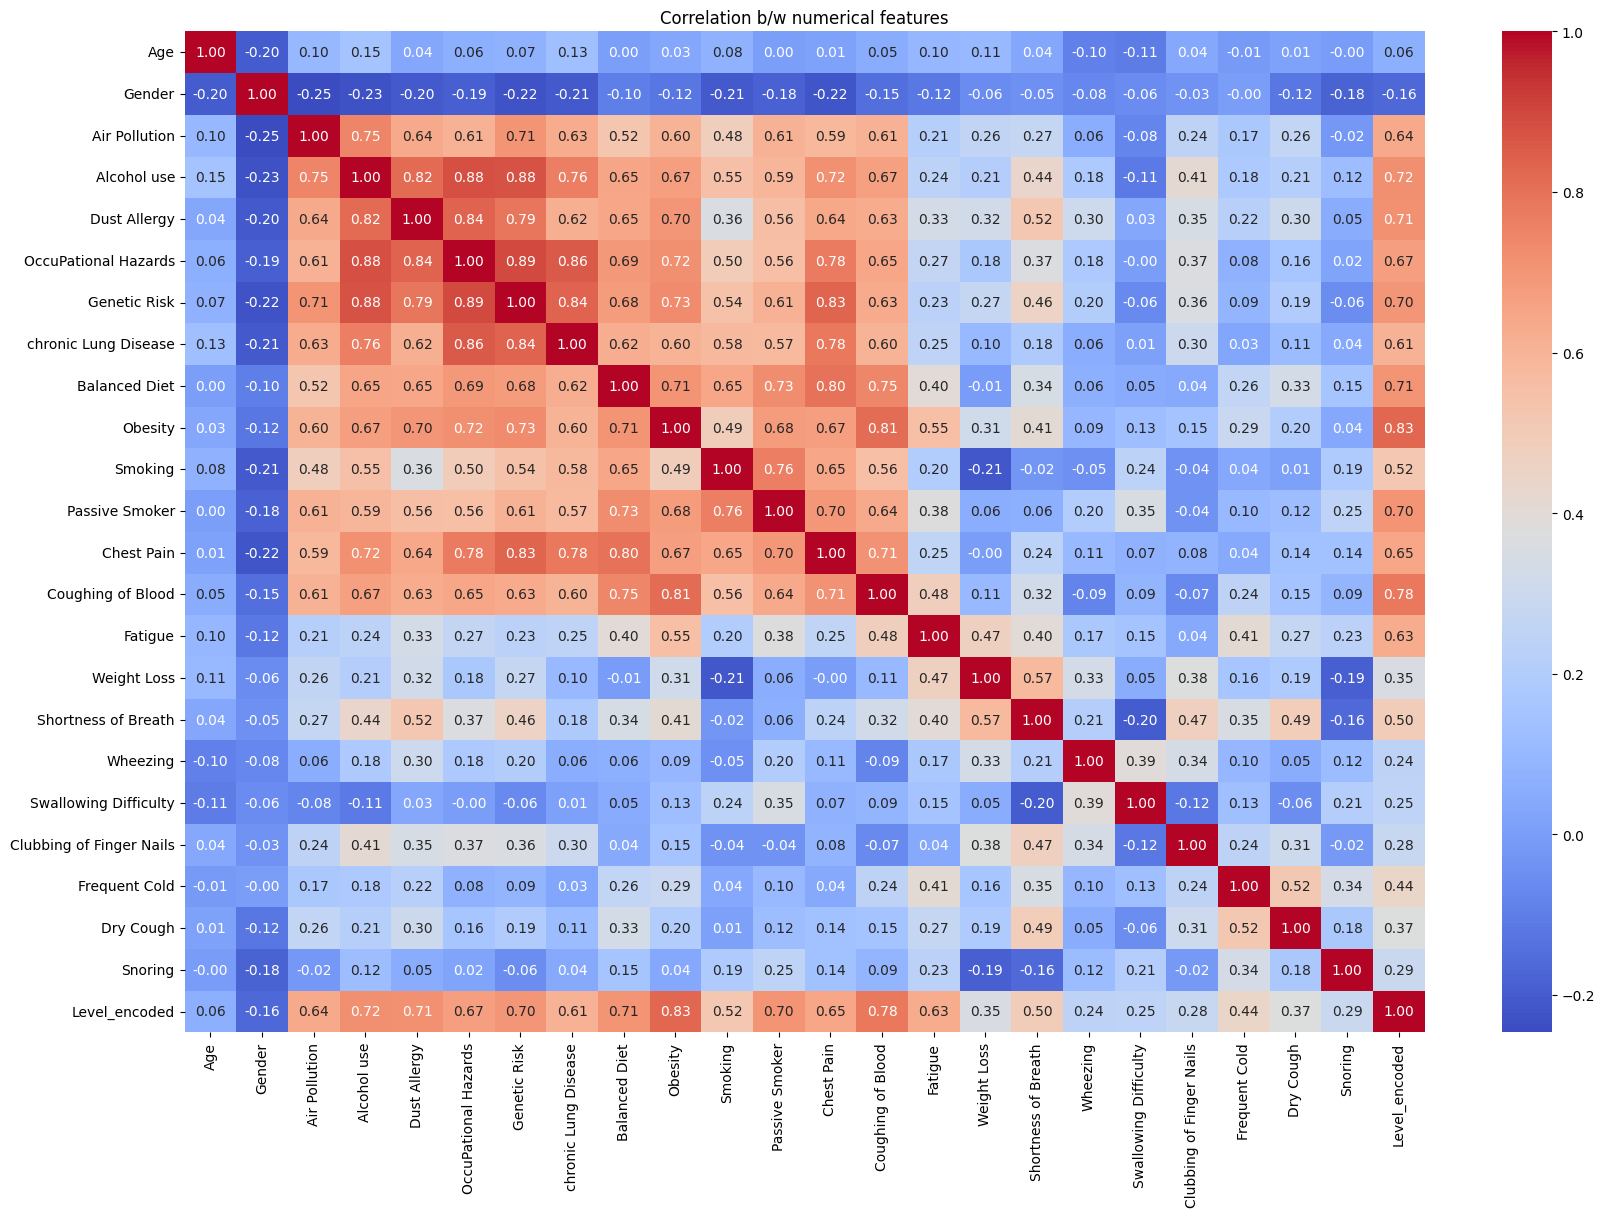

In [132]:
plt.figure(figsize=(20, 13))  # Width x Height in inches
df['Level_encoded'] = df['Level'].map({'Low': 0, 'Medium':1, 'High':2})
myDf = df.drop(columns = 'index')
sns.heatmap(myDf.select_dtypes(include=['int64', 'float64']).corr(), annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title("Correlation b/w numerical features")
plt.show()

In [133]:
myDf['Level'].value_counts()

Level
High      365
Medium    332
Low       303
Name: count, dtype: int64

The values are fairly balanced

In [134]:
myDf.isnull().sum()

Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
Level_encoded               0
dtype: int64

In [142]:
myDf.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [143]:
myDf.duplicated().sum()

np.int64(0)

In [144]:
corr_matrix = myDf.select_dtypes(include=['int64', 'float64']).corr()
level_corr = corr_matrix['Level_encoded'].drop('Level_encoded').sort_values(key=abs, ascending=False)
print(level_corr)


Obesity                     0.827435
Coughing of Blood           0.782092
Alcohol use                 0.718710
Dust Allergy                0.713839
Balanced Diet               0.706273
Passive Smoker              0.703594
Genetic Risk                0.701303
OccuPational Hazards        0.673255
Chest Pain                  0.645461
Air Pollution               0.636038
Fatigue                     0.625114
chronic Lung Disease        0.609971
Smoking                     0.519530
Shortness of Breath         0.497024
Frequent Cold               0.444017
Dry Cough                   0.373968
Weight Loss                 0.352738
Snoring                     0.289366
Clubbing of Finger Nails    0.280063
Swallowing Difficulty       0.249142
Wheezing                    0.242794
Gender                     -0.164985
Age                         0.060048
Name: Level_encoded, dtype: float64


Obesity -> most influential feature on Level

In [145]:
selected_features = level_corr[abs(level_corr) > 0.3].index.tolist()

print("Selected features:", selected_features)

Selected features: ['Obesity', 'Coughing of Blood', 'Alcohol use', 'Dust Allergy', 'Balanced Diet', 'Passive Smoker', 'Genetic Risk', 'OccuPational Hazards', 'Chest Pain', 'Air Pollution', 'Fatigue', 'chronic Lung Disease', 'Smoking', 'Shortness of Breath', 'Frequent Cold', 'Dry Cough', 'Weight Loss']


In [146]:

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [col for col in upper.columns if any(upper[col].abs() > 0.85)]
print("Highly correlated (drop candidates):", to_drop)


Highly correlated (drop candidates): ['OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease']


In [147]:
myDf.describe()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level_encoded
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,3.948000,4.195000,4.438000,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000,1.062000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,2.495902,2.311778,2.280209,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686,0.815365
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,1.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000,2.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,8.000000,8.000000,9.000000,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000,2.000000


In [155]:
myDf = myDf.select_dtypes(include=['int64', 'float64'])
X = myDf.drop(columns = ["Level_encoded"])
Y = myDf["Level_encoded"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [156]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=0, stratify=Y)

# Further split train → train + validation
X_train_sub, X_val, y_train_sub, y_val = train_test_split(
    X_train, y_train, test_size=0.3, random_state=0, stratify=y_train)

In [157]:
print("Train size:", X_train_sub.shape)
print("Validation size:", X_val.shape)
print("Test size:", X_test.shape)

Train size: (560, 23)
Validation size: (240, 23)
Test size: (200, 23)


In [158]:
scaler = StandardScaler()
X_train_sub_scaled = scaler.fit_transform(X_train_sub)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [159]:
metrics = {"Euclidean": 2, "Manhattan": 1}
results = []

for name, p in metrics.items():
    knn = KNeighborsClassifier(n_neighbors=5, p=p)
    knn.fit(X_train_sub_scaled, y_train_sub)
    
    train_acc = accuracy_score(y_train_sub, knn.predict(X_train_sub_scaled))
    val_acc = accuracy_score(y_val, knn.predict(X_val_scaled))
    test_acc = accuracy_score(y_test, knn.predict(X_test_scaled))
    
    results.append([name, train_acc, val_acc, test_acc])

In [160]:
results_df = pd.DataFrame(results, columns=["Metric", "Train Acc", "Val Acc", "Test Acc"])
print(results_df)

      Metric  Train Acc  Val Acc  Test Acc
0  Euclidean        1.0      1.0       1.0
1  Manhattan        1.0      1.0       1.0
